<a href="https://colab.research.google.com/github/magomeda228/Colab_Google_ML_H-W/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
# import polars as pl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
# pl.Config().set_tbl_rows(100)
# pl.Config().set_tbl_cols(100)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# фиксируем random_state для воспроизводимости результатов
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [10]:
from sklearn.metrics import average_precision_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

Random Classifier metrics
AUC-PR: 0.5057
AUC-ROC: 0.5000


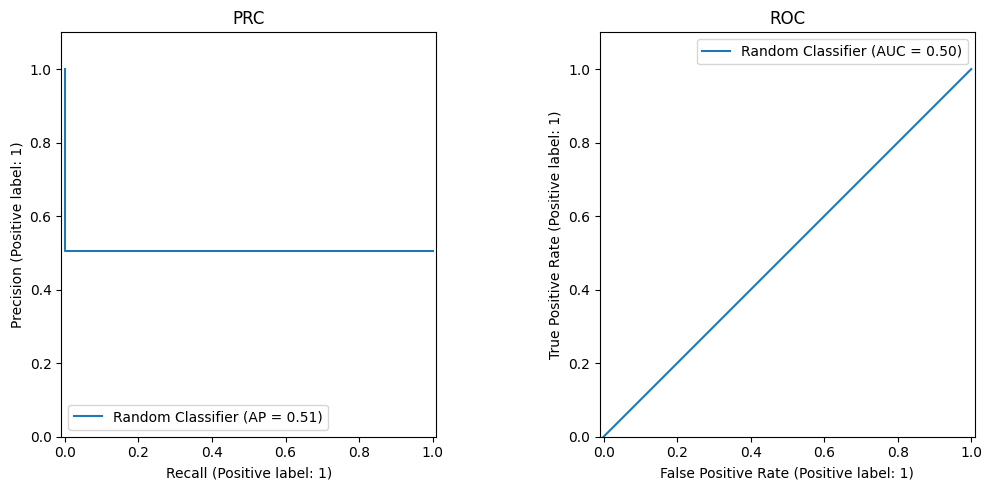

In [ ]:
def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

In [ ]:
df_metrics = pd.DataFrame(
    columns=['auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)
# добавление очередной строки с характеристиками метода
df_metrics.loc['Random Classifier'] = [
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,auc_pr,roc_auc_score,reg_const
Random Classifier,0.505667,0.5,0.0


In [9]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, average_precision_score, log_loss, brier_score_loss

C: 1e-10, AUC_ROC: 0.8151, AUC_PR: 0.7914
C: 1e-09, AUC_ROC: 0.8151, AUC_PR: 0.7914
C: 1e-08, AUC_ROC: 0.8152, AUC_PR: 0.7914
C: 1e-07, AUC_ROC: 0.8153, AUC_PR: 0.7916
C: 1e-06, AUC_ROC: 0.8167, AUC_PR: 0.7937
C: 1e-05, AUC_ROC: 0.8262, AUC_PR: 0.8069
C: 0.0001, AUC_ROC: 0.8414, AUC_PR: 0.8271
C: 0.001, AUC_ROC: 0.8450, AUC_PR: 0.8274
C: 0.01, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 0.1, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 1.0, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 10.0, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 100.0, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 1000.0, AUC_ROC: 0.8454, AUC_PR: 0.8265
C: 10000.0, AUC_ROC: 0.8454, AUC_PR: 0.8265


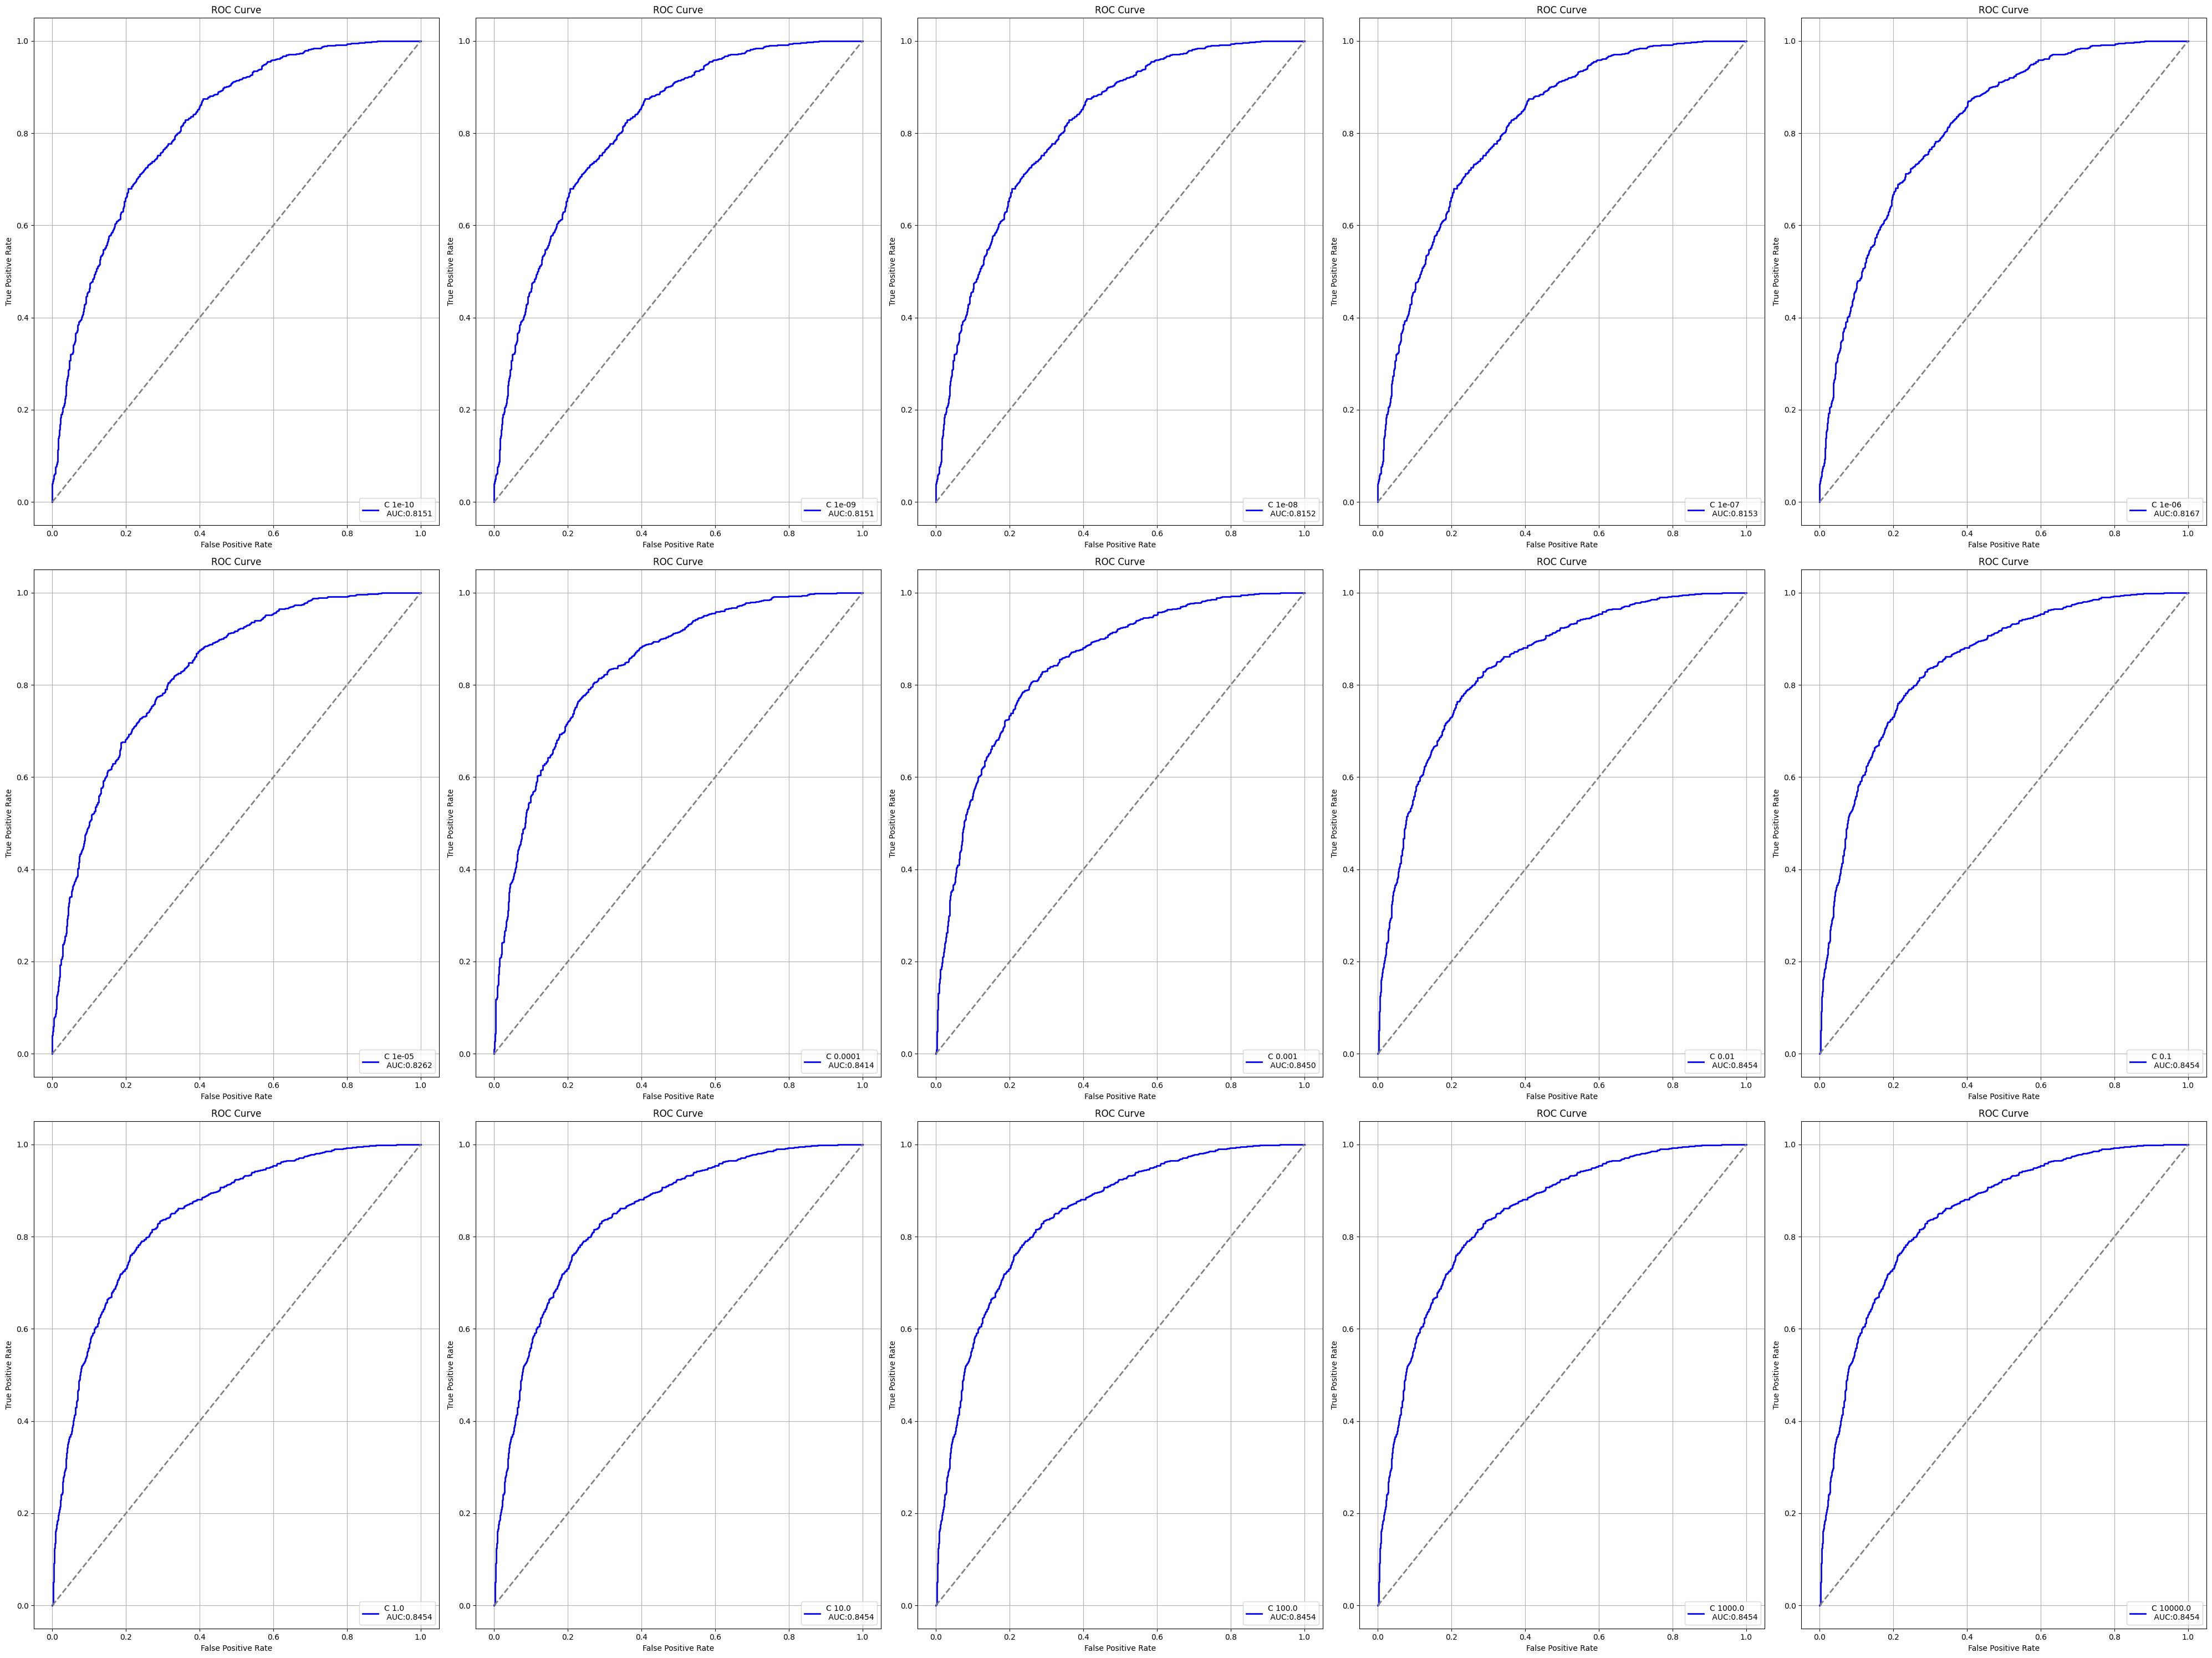

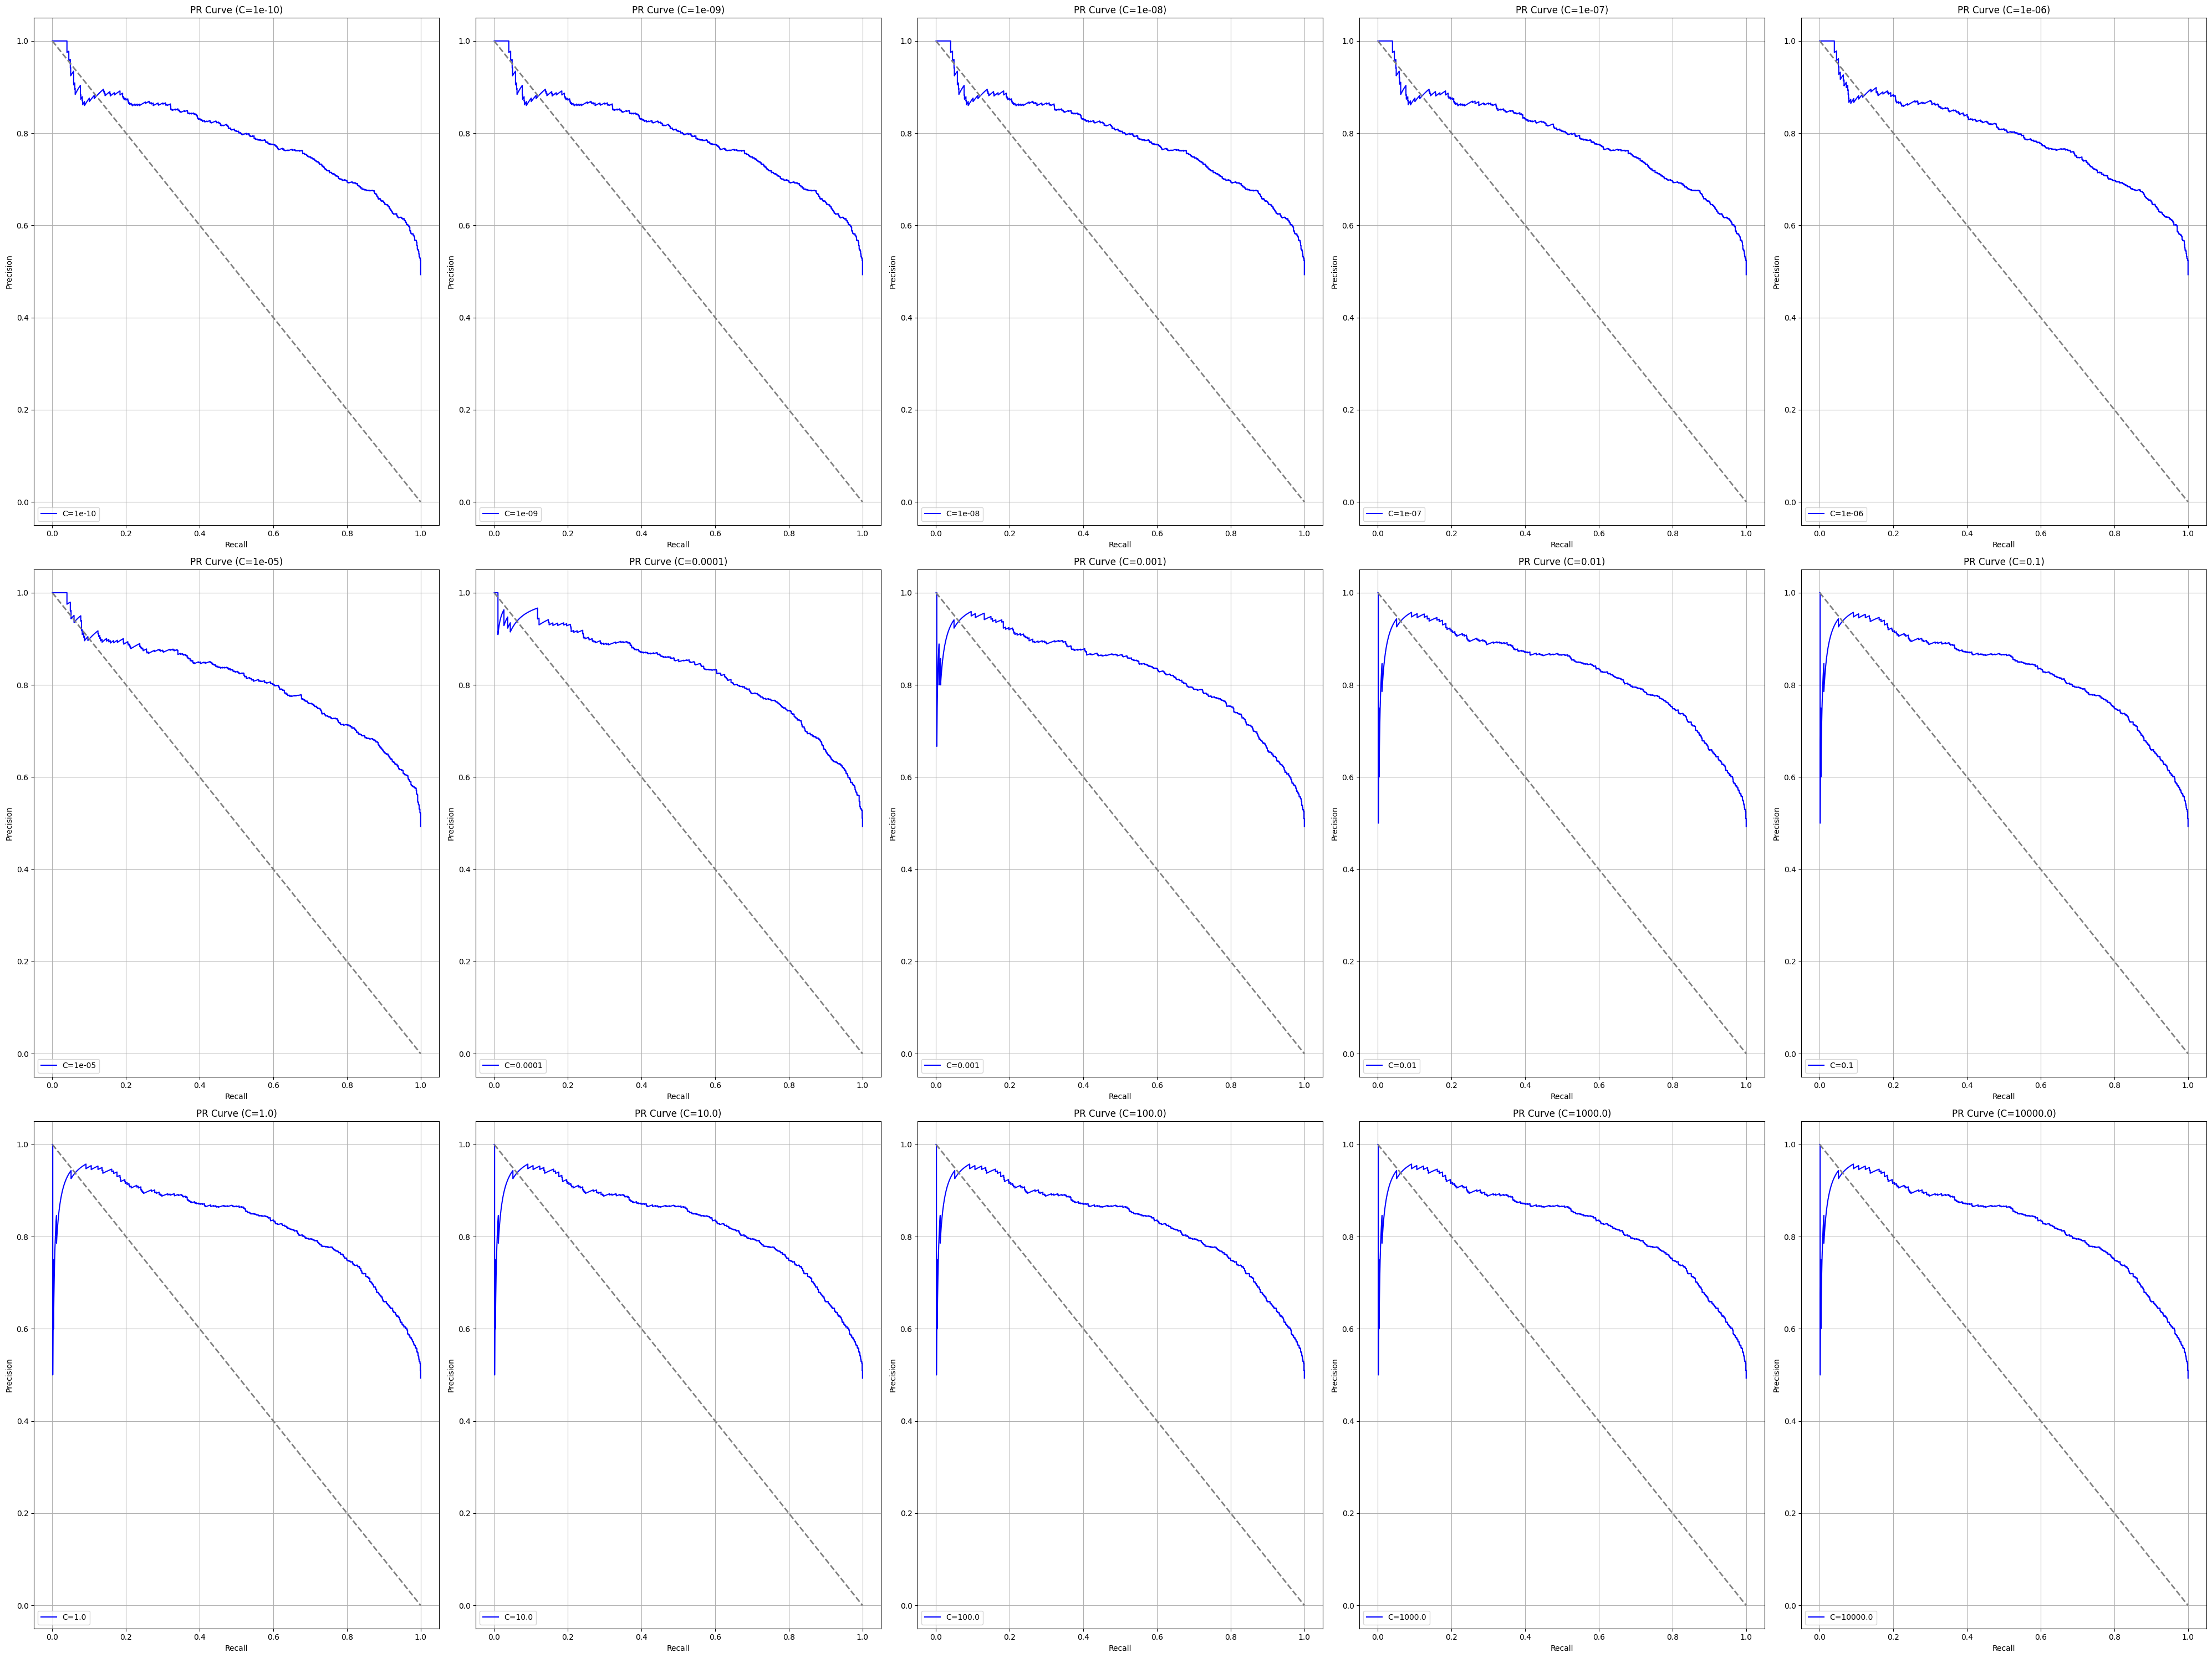

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(40,30))
for idx, i in enumerate(np.logspace(-10,4,15)):
  model = LinearSVC(C=i, max_iter=10000, random_state=42)
  model.fit(X_train, y_train)
  y_scores = model.decision_function(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  auc_pr = average_precision_score(y_test, y_scores)

  plt.subplot(3, 5, idx + 1)
  plt.plot(fpr, tpr, color='blue', lw=2, label=f"C {i} \n AUC:{roc_auc:.4f}")
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Диагональ
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.grid()
  print(f"C: {i}, AUC_ROC: {roc_auc:.4f}, AUC_PR: {auc_pr:.4f}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(40,30))
for idx, i in enumerate(np.logspace(-10, 4, 15)):
    model = LinearSVC(C=i, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_scores = model.decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    plt.subplot(3, 5, idx + 1)
    plt.plot(recall, precision, color='blue', label=f"C={i}")
    plt.plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)  # Диагональ
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve (C={i})")
    plt.legend(loc="lower left")
    plt.grid()

plt.tight_layout()
plt.show()

Исходя из значений метрик AUC_ROC, AUC_PR, можно сделать вывод, что на гпиерпараметре C=0.1 так как достигаются оптимальные значения для на AUC_ROC=0.8454 AUC_PR=0.8265. При меньших значениях С модель неправильно классифицирует объекты на датасете, а после 0.1 происходит выход на плато и метрики не улучшаются

C: 1e-10, AUC_ROC: 0.8151, AUC_PR: 0.7914
C: 1e-09, AUC_ROC: 0.8151, AUC_PR: 0.7914
C: 1e-08, AUC_ROC: 0.8151, AUC_PR: 0.7914
C: 1e-07, AUC_ROC: 0.8152, AUC_PR: 0.7914
C: 1e-06, AUC_ROC: 0.8153, AUC_PR: 0.7917
C: 1e-05, AUC_ROC: 0.8171, AUC_PR: 0.7943
C: 0.0001, AUC_ROC: 0.8276, AUC_PR: 0.8088
C: 0.001, AUC_ROC: 0.8414, AUC_PR: 0.8268
C: 0.01, AUC_ROC: 0.8452, AUC_PR: 0.8270
C: 0.1, AUC_ROC: 0.8456, AUC_PR: 0.8259
C: 1.0, AUC_ROC: 0.8457, AUC_PR: 0.8260
C: 10.0, AUC_ROC: 0.8457, AUC_PR: 0.8260
C: 100.0, AUC_ROC: 0.8457, AUC_PR: 0.8260
C: 1000.0, AUC_ROC: 0.8457, AUC_PR: 0.8260
C: 10000.0, AUC_ROC: 0.8457, AUC_PR: 0.8260


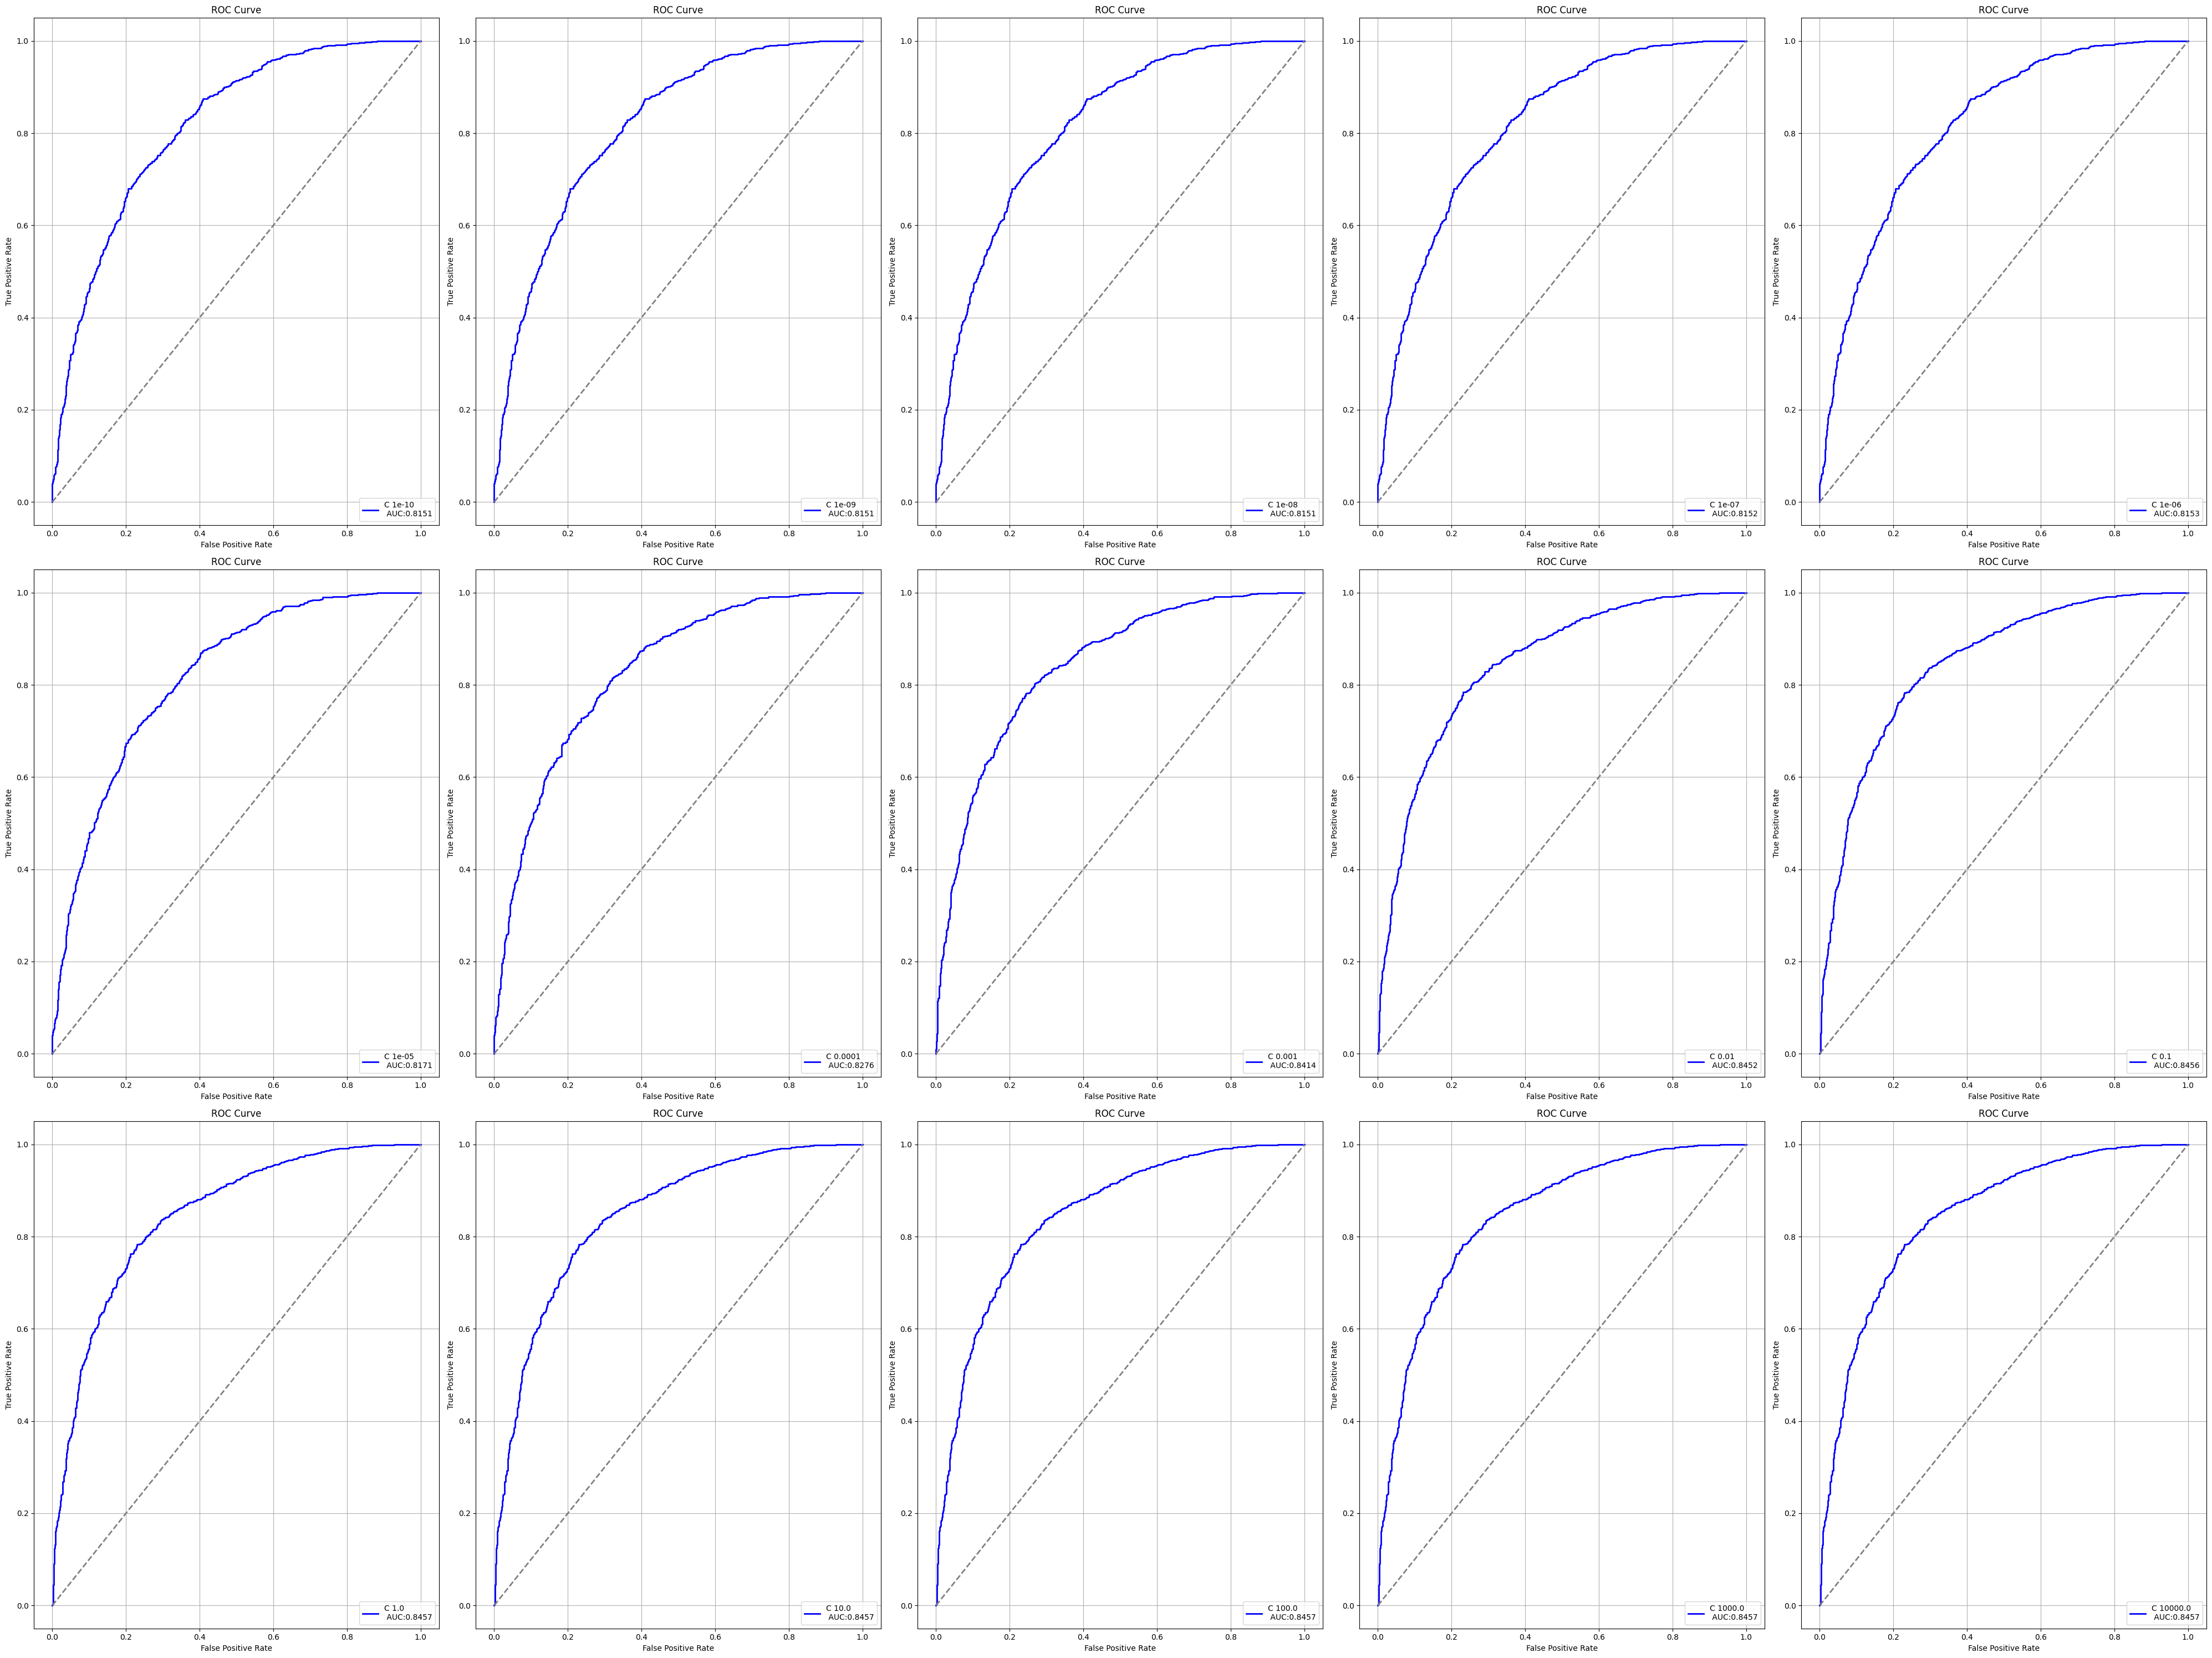

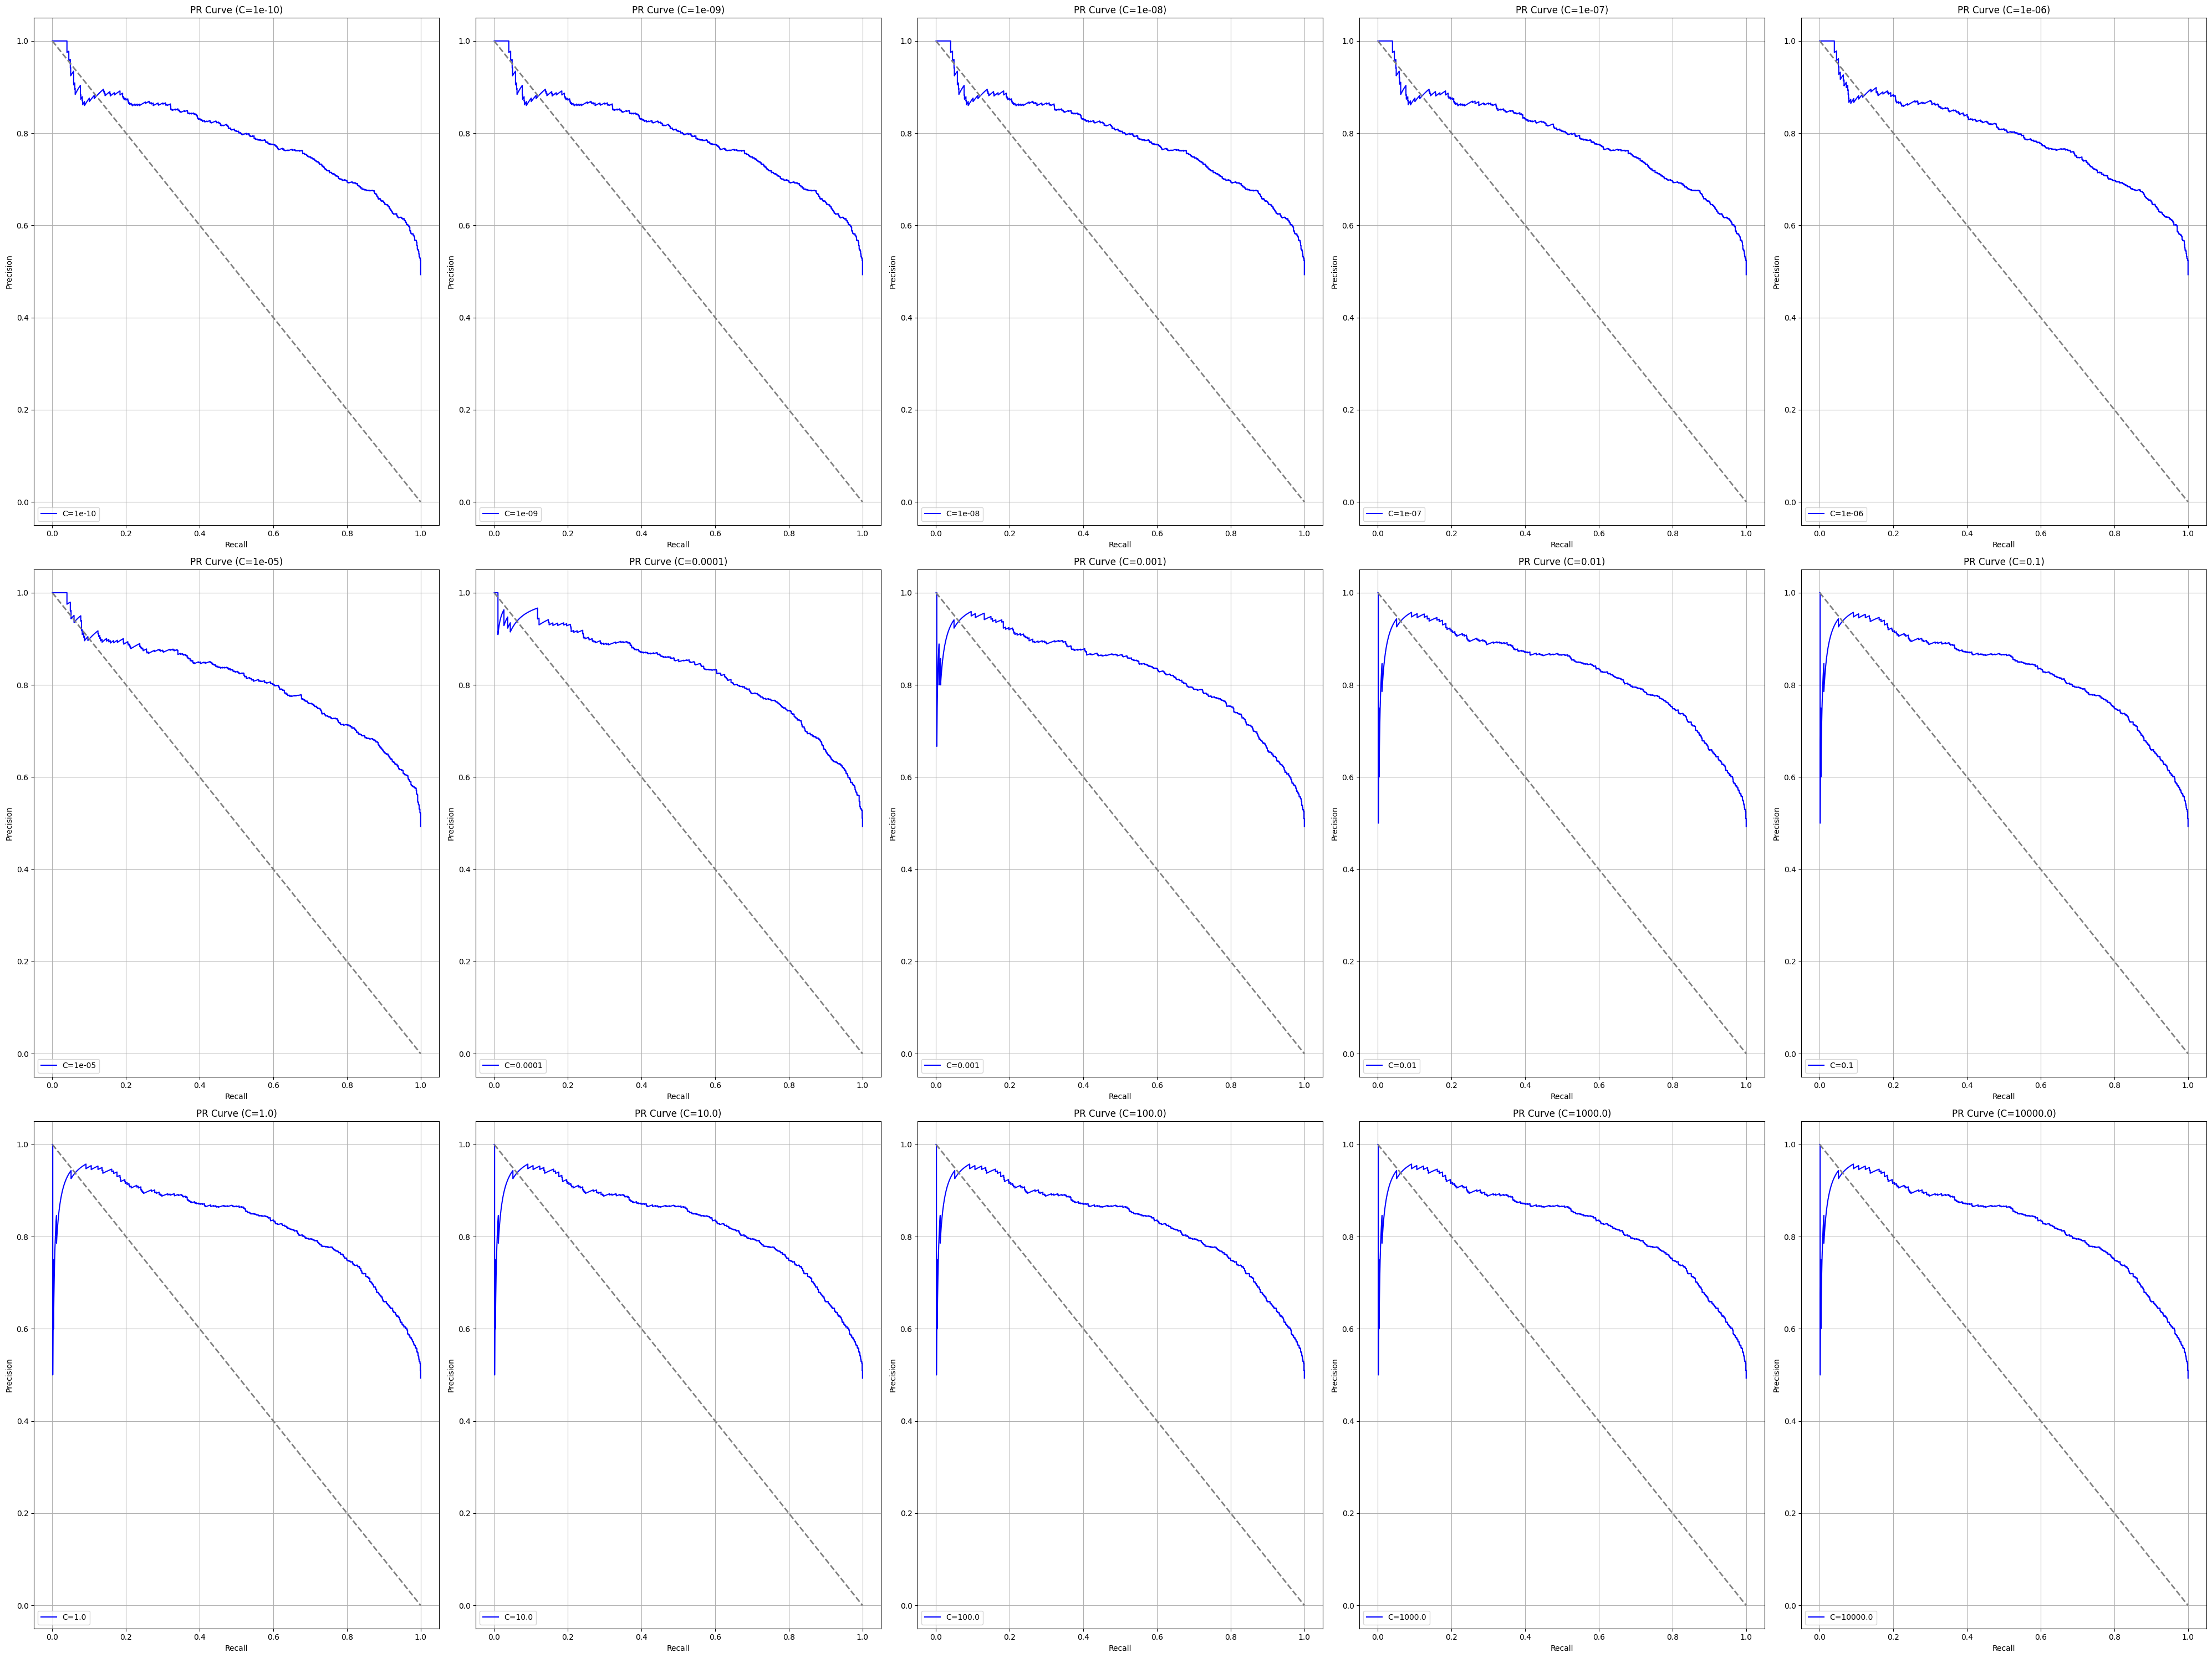

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(40,30))
for idx, i in enumerate(np.logspace(-10,4,15)):
  model = LogisticRegression(C=i,penalty='l2', random_state=42)
  model.fit(X_train, y_train)
  y_scores = model.decision_function(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  auc_pr = average_precision_score(y_test, y_scores)

  plt.subplot(3, 5, idx + 1)
  plt.plot(fpr, tpr, color='blue', lw=2, label=f"C {i} \n AUC:{roc_auc:.4f}")
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Диагональ
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.grid()
  print(f"C: {i}, AUC_ROC: {roc_auc:.4f}, AUC_PR: {auc_pr:.4f}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(40,30))
for idx, i in enumerate(np.logspace(-10, 4, 15)):
    model = LinearSVC(C=i, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_scores = model.decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    plt.subplot(3, 5, idx + 1)
    plt.plot(recall, precision, color='blue', label=f"C={i}")
    plt.plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)  # Диагональ
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve (C={i})")
    plt.legend(loc="lower left")
    plt.grid()

plt.tight_layout()
plt.show()

Для LogisticRegression можно сказать, что наиболее оптимальным гиперпараметром будет C=1.0 так как достигаются оптимальные значения для на AUC_ROC=0.8457 AUC_PR=0.8260. При меньших значениях С модель неправильно классифицирует объекты на датасете, а после 1.0 происходит выход на плато и метрики не улучшаются
В тоже время можно взять значение гиперпараметрам 0.01 на нем наблюдается относительное улучшение метрики AUC_PR, но ухудшение AUC_ROC

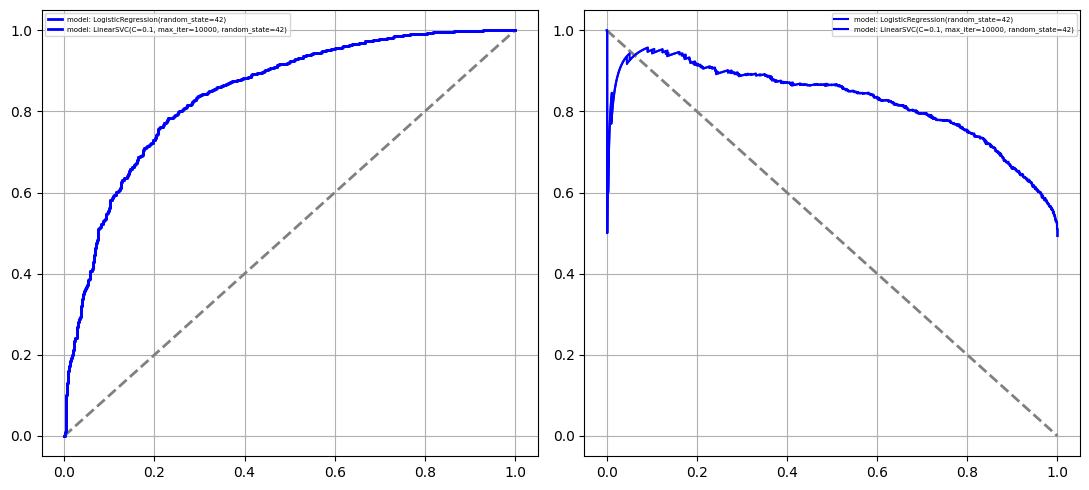

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(C=1.0,penalty='l2', random_state=42)
model_2 = LinearSVC(C=0.1, max_iter=10000, random_state=42)

model.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_scores = model.decision_function(X_test)
y_scores_2 = model_2.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)
roc_auc_2 = auc(fpr_2, tpr_2)

auc_pr = average_precision_score(y_test, y_scores)

fig, ax = plt.subplots(1, 2, figsize=(11,5))

y_scores = model.decision_function(X_test)
y_scores_2 = model_2.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, y_scores_2)


ax[0].plot(fpr, tpr, color='blue', lw=2, label=f"model: {model}")
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Диагональ
ax[0].plot(fpr_2, tpr_2, color='blue', lw=2, label=f"model: {model_2}")
ax[0].legend(fontsize=5)
ax[0].grid()

ax[1].plot(recall, precision, color='blue', label=f"model: {model}")
ax[1].plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)
ax[1].plot(recall_2, precision_2, color='blue', label=f"model: {model_2}")
ax[1].legend(fontsize=5)
ax[1].grid()

plt.tight_layout()
plt.show()


Судя из графиков метрик PR, ROC кривые для моделей при наилучших гиперпараметрах неразличимы невороруженным глазом

Визуализирую разделяющую прямую, все объекты и опорные векторы.

In [ ]:
X, y = make_classification(
    n_samples=200, n_features=10, n_informative=5,
    n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X[:, :2],
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

Отрисуем для данной выборки опорные вектора

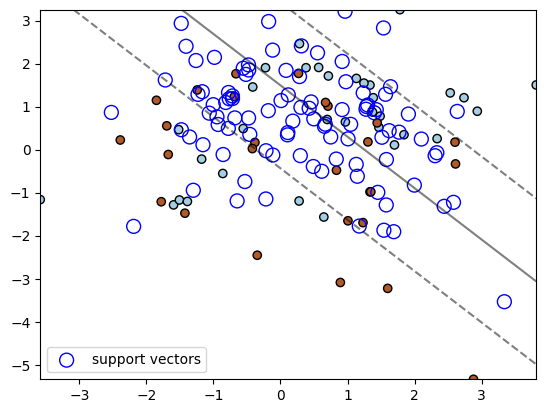

In [ ]:
def plot_svm_2D(X, y, model = SVC(kernel='linear'),  plot_support=True):

    xx = np.linspace(X[:,0].min(), X[:,0].max(), 30)
    yy = np.linspace(X[:,1].min(), X[:,1].max(), 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T


    Z = model.decision_function(xy).reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


    plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k'
    )

    if plot_support:
        plt.scatter(
            model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            label='support vectors',
            s=100,
            linewidth=1,
            edgecolor="blue",
            facecolors='none'
        )

    plt.legend()
    plt.show()

model = SVC(kernel='linear')
model.fit(X_train, y_train)

plot_svm_2D(X_test, y_test, model)

Теперь визуализируем на тех же данных метод логистиечской регресии

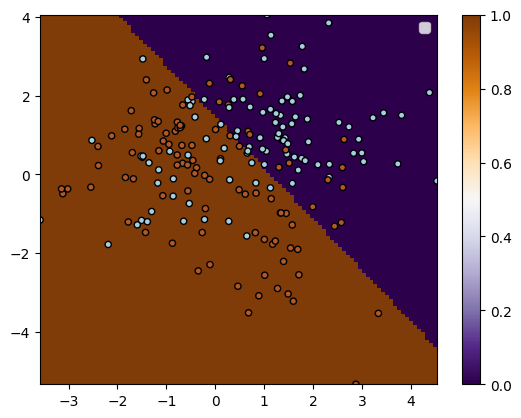

In [ ]:
def plot_logreg_2D(X, y, model):

    xx = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yy = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.predict(xy)
    Z = Z.reshape((XX.shape))

    image = plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect='auto',
        origin='lower',
        cmap=plt.cm.PuOr_r
    )

    plt.scatter(
        X[:, 0], X[:, 1], c=y, edgecolor='k', s=20,
        cmap=plt.cm.Paired
    )

    plt.colorbar(image)
    plt.legend()
    plt.show()

model = LogisticRegression()
model.fit(X_train, y_train)

plot_logreg_2D(X, y, model)

Далее откалибруем вероятности и построим калибровочные прямые для SVC (C=1.0) и LogisticRegression (C=0.1), наряду с этим проанализируем Log_loss и Brier метрики для каждой модели

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)

        bin_mask = (preds >= l) & (preds < r) if i < n_bins - 1 else (preds >= l) & (preds <= r)
        bin_values = y_test[bin_mask]

        if len(bin_values) > 0:
            bin_real_ratios.append(np.mean(bin_values == 1))
        else:
            bin_real_ratios.append(None)

    # Удаление пустых значений (None) из данных перед построением графика
    valid_points = [(x, y) for x, y in zip(bin_middle_points, bin_real_ratios) if y is not None]
    bin_middle_points, bin_real_ratios = zip(*valid_points) if valid_points else ([], [])

    plt.figure(figsize=(6, 6))
    plt.plot(bin_middle_points, bin_real_ratios, marker='o', label='Calibration curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Predicted probability')
    plt.ylabel('Observed frequency')
    plt.title('Calibration Curve')
    plt.grid()
    plt.legend()
    plt.show()

model: LogisticRegression(C=0.1, random_state=42)
 log_loss: 0.659507060643819
 brier loss: 0.2286414656672083


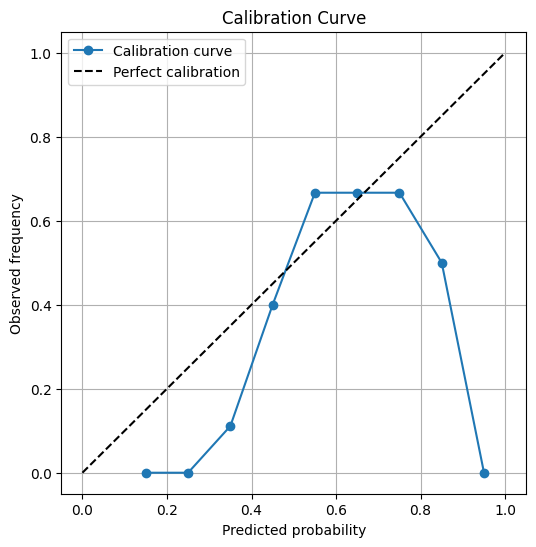

In [ ]:
X, y = make_classification(
    n_samples=200, n_features=10, n_informative=5,
    n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X[:, :2],
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(C=0.1, random_state=42)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:,1]

print(f"model: {model}\n log_loss: {log_loss(y_test, preds)}\n brier loss: {brier_score_loss(y_test, preds)}")
plot_calibration_curve(y_test, preds)

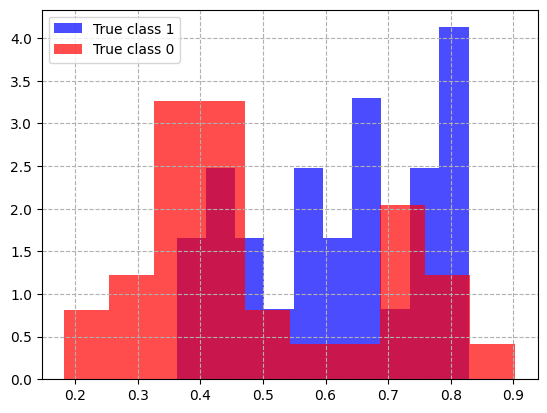

In [ ]:
plt.hist(preds[y_test == 1], bins=10, alpha=0.7, label='True class 1', color='blue', density=True)

# Гистограмма для вероятностей класса 0
plt.hist(preds[y_test == 0], bins=10, alpha=0.7, label='True class 0', color='red', density=True)
plt.legend()
plt.grid(linestyle='--')

model: SVC(probability=True, random_state=42)
 log_loss: 0.6406686253492405
 brier loss: 0.22494494396676934


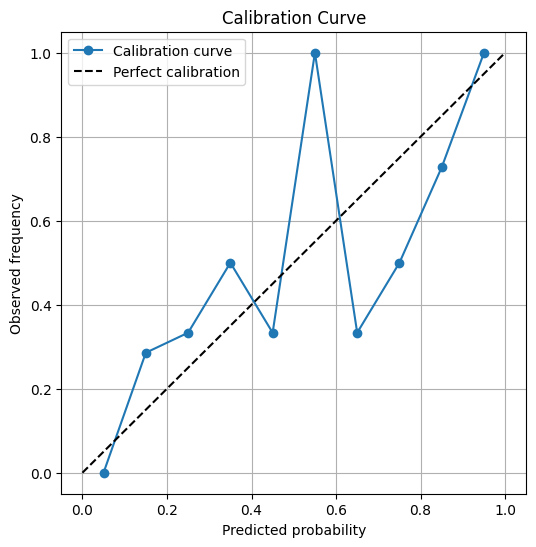

In [ ]:
model = SVC(C=1e0, random_state=42, probability=True)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:,1]

print(f"model: {model}\n log_loss: {log_loss(y_test, preds)}\n brier loss: {brier_score_loss(y_test, preds)}")

plot_calibration_curve(y_test, preds)

Основываясь на результатах можно сказать, что SVC показывает лучший результат на log_loss метрике по сравнению с LogisticRegression на 0.02, но хуже на 0.01 на brier loss метрике

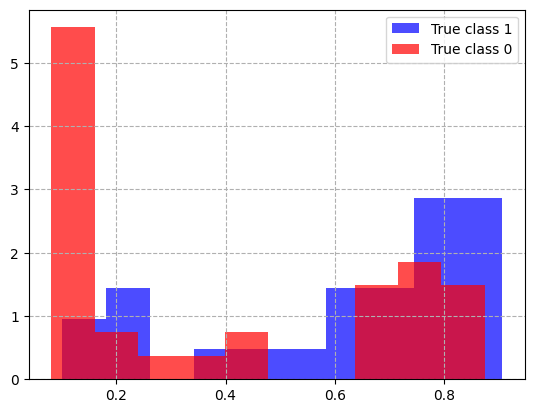

In [ ]:
plt.hist(preds[y_test == 1], bins=10, alpha=0.7, label='True class 1', color='blue', density=True)
plt.hist(preds[y_test == 0], bins=10, alpha=0.7, label='True class 0', color='red', density=True)
plt.legend()
plt.grid(linestyle='--')

Судя по распредлениям ответов классификаторов можно отметит на SVC смещенные пики к границам единичного итервала (как на 1, так и 0 классе), но на LogisticRegression краевые пики распределены ближе к середине единичного интервала (0.2 и 0.8) как для 1 так и 0 класса
Эти результаты как раз и говорят о пренципальном отличии работы методов SVC и LogisticRegression

model: CalibratedClassifierCV()
 log_loss: 0.6667946901109499
 brier loss: 0.22926342769045338


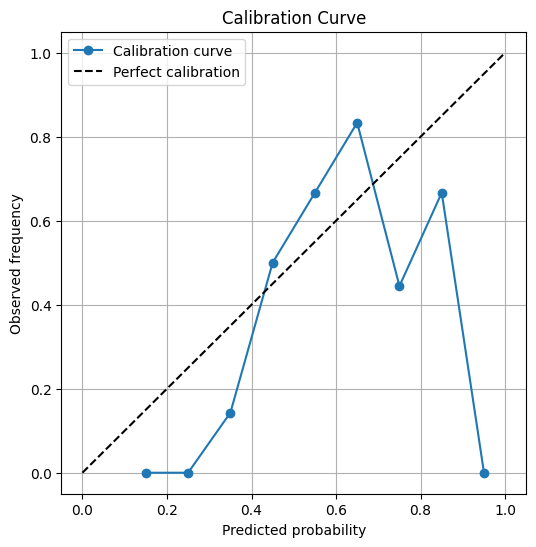

In [ ]:
model = CalibratedClassifierCV()
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:,1]

print(f"model: {model}\n log_loss: {log_loss(y_test, preds)}\n brier loss: {brier_score_loss(y_test, preds)}")

plot_calibration_curve(y_test, preds)

Как видим Brier и Log loss метрики на CalibratedClassifierCV стали лучше на примерно на 0.01 и 0.02, что свидетельствует о незначительной, но более качественных ответах классификаторов


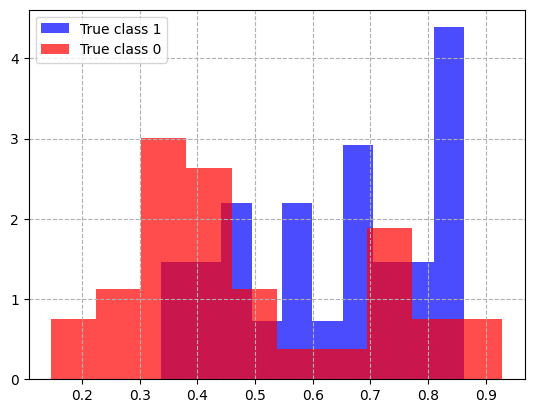

In [ ]:
plt.hist(preds[y_test == 1], bins=10, alpha=0.7, label='True class 1', color='blue', density=True)
plt.hist(preds[y_test == 0], bins=10, alpha=0.7, label='True class 0', color='red', density=True)
plt.legend()
plt.grid(linestyle='--')

In [6]:

import kagglehub

path = kagglehub.dataset_download("heeraldedhia/bike-buyers") +  "/bike_buyers.csv"

100%|██████████| 22.2k/22.2k [00:00<00:00, 19.0MB/s]

Extracting files...


In [11]:
dat1 = pd.read_csv(path)
dat1 = dat1.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [12]:
dat1.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,Married,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,60000.0,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,40.0,Yes


In [ ]:
dat1.isna().sum()

,0
ID,0
Marital Status,7
Gender,11
Income,6
Children,8
Education,0
Occupation,0
Home Owner,4
Cars,9
Commute Distance,0


In [13]:
from time import time
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [14]:
calc_time = []

time: 0.06946969032287598
 auc_pr: 0.5958912956986967


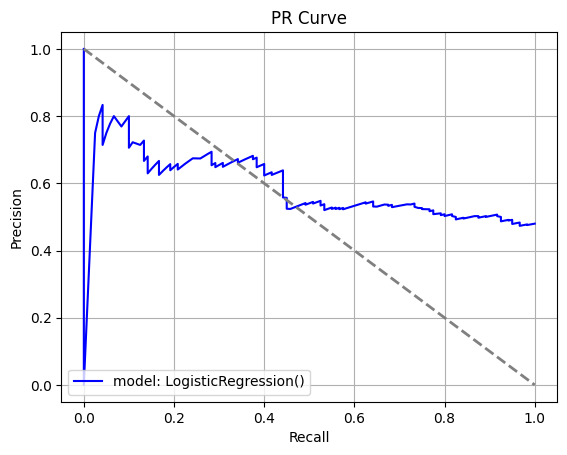

In [ ]:
from sklearn.model_selection import train_test_split
start_time = time()
y = dat1['Purchased Bike']
X = dat1.drop(columns='Purchased Bike')

X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(exclude='object')
enc = OrdinalEncoder()
X_categorical, y = enc.fit_transform(X_categorical), LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.25, random_state=777, stratify=y)
model = LogisticRegression()

model.fit(X_train, y_train)
y_scores = model.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

auc_pr = average_precision_score(y_test, y_scores)
end_time = time()
calc_time.append(end_time - start_time)
print(f"time: {end_time - start_time}\n auc_pr: {auc_pr}")
plt.plot(recall, precision, color='blue', label=f"model: {model}")
plt.plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)  # Диагональ
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve")
plt.legend(loc="lower left")
plt.grid()

time: 0.0604245662689209
 auc_pr: 0.6707775844988629


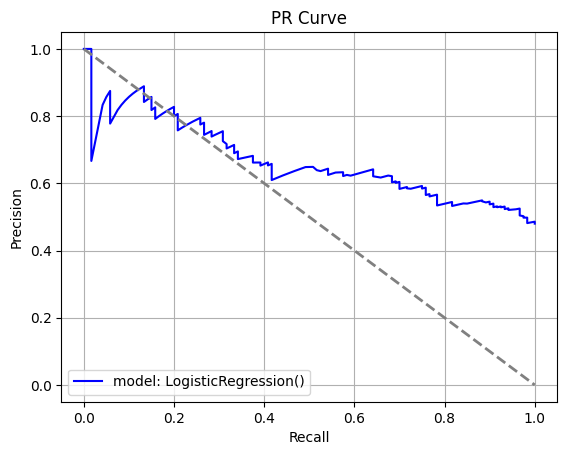

In [ ]:
start_time = time()
y = dat1['Purchased Bike']
X = dat1.drop(columns='Purchased Bike')

X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(exclude='object')
enc = OneHotEncoder()
X_categorical, y = enc.fit_transform(X_categorical), LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.25, random_state=777, stratify=y)
model = LogisticRegression()

model.fit(X_train, y_train)
y_scores = model.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

auc_pr = average_precision_score(y_test, y_scores)
end_time = time()
calc_time.append(end_time - start_time)
print(f"time: {end_time - start_time}\n auc_pr: {auc_pr}")
plt.plot(recall, precision, color='blue', label=f"model: {model}")
plt.plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)  # Диагональ
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve")
plt.legend(loc="lower left")
plt.grid()

Видно судя по PR кривой и AUC_PR, что кодирование OneHotEncoding показывает лучшую метрику auc_pr на 0.02 по сравнению с labelencoder

In [16]:
from sklearn.preprocessing import TargetEncoder, LabelEncoder
from time import time

time: 0.042144775390625
 auc_pr: 0.6025995189834822


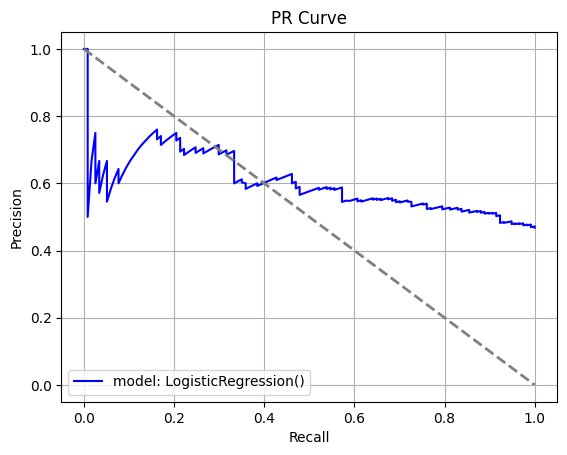

In [19]:
from sklearn.model_selection import train_test_split
start_time = time()
y = dat1['Purchased Bike']
X = dat1.drop(columns='Purchased Bike')

X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(exclude='object')

enc = TargetEncoder()
X_categorical, y = enc.fit_transform(X_categorical, y), LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.25, random_state=777)
model = LogisticRegression()

model.fit(X_train, y_train)
y_scores = model.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

auc_pr = average_precision_score(y_test, y_scores)
end_time = time()
calc_time.append(end_time - start_time)
print(f"time: {end_time - start_time}\n auc_pr: {auc_pr}")
plt.plot(recall, precision, color='blue', label=f"model: {model}")
plt.plot([0, 1], [1, 0], color='gray', linestyle='--', lw=2)  # Диагональ
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve")
plt.legend(loc="lower left")
plt.grid()

Как видно на LinearRegression TargetEcoding показывает хуже более пологую и низкую PR кривую  по сравнению с OneHotEncoding и OrdianlEncdoing вместе с метрикой, но меньшее время затраченное на полную обработку данных (на 0.02с)

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class TargetMeanEncoderWithNoise(BaseEstimator, TransformerMixin):
    def __init__(self, noise_level=0.01):
        self.encoding_map = {}
        self.noise_level = noise_level  # Уровень шума

    def fit(self, X, y):
        X = pd.DataFrame(X)
        y = pd.Series(y)
        for col in X.columns:
            self.encoding_map[col] = y.groupby(X[col]).mean().to_dict()
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            encoded = X[col].map(self.encoding_map[col])
            noise = np.random.normal(0, self.noise_level, size=encoded.shape)  # Генерация шума
            X[col] = encoded + noise
        return X

In [ ]:
pipeline = Pipeline([
    ('target_encoding', TargetMeanEncoder()),
    ('logreg', LogisticRegression())
])

In [23]:

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2025-01-04 18:09:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.data’

adult.data              [  <=>               ]   3.79M  8.91MB/s    in 0.4s    

2025-01-04 18:09:31 (8.91 MB/s) - ‘adult.data’ saved [3974305]



In [25]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

df = pd.read_csv('adult.data', header=None, names=columns)
df['income'] = (df['income'] != " <=50K").astype('int32')
df.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
29406,24,Private,243190,Assoc-acdm,12,Separated,Craft-repair,Unmarried,Asian-Pac-Islander,Male,8614,0,40,United-States,1


In [51]:
y = df['income']
X = df.drop(columns= 'income')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 777, stratify=y)

cat = X.select_dtypes(include='object').columns
num = X.select_dtypes(exclude='object').columns

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
model = LogisticRegression()
processor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
    ]
)

model_pipeline = Pipeline(
    steps = [
        ('preprocessor', processor),
        ('classifier', LogisticRegression(random_state=777))
    ]
)
model_pipeline.fit(X_train, y_train)
y_score = model_pipeline.predict_proba(X_test)[:, 1]

print(f"auc_pr: {average_precision_score(y_test, y_score)}")

auc_pr: 0.7672341309944473


Видно что при работе модели с категориальными признаками и нумеровочными метрика auc_pr стала 0.76 на LogisticRegression

Попробуем раздлеить на train и валидационную выборку

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=777, stratify=y_train)

In [64]:
cat = X.select_dtypes(include='object').columns
num = X.select_dtypes(exclude='object').columns

In [67]:
model = LogisticRegression()
processor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
    ]
)

model_pipeline = Pipeline(
    steps = [
        ('preprocessor', processor),
        ('classifier', LogisticRegression(random_state=777))
    ]
)
model_pipeline.fit(X_train, y_train)
y_val_score = model_pipeline.predict_proba(X_val)[:, 1]
y_score = model_pipeline.predict_proba(X_test)[:,1]
print(f"auc_pr_valid: {average_precision_score(y_val, y_val_score)} \n",
      f"auc_pr_test: {average_precision_score(y_test, y_score)}")

auc_pr_valid: 0.7739472302691701 
 auc_pr_test: 0.766473989839995


Теперь видно что на валидации метрика auc_pr стала лучше на 0.01

Отберем топ 40 признаков, дабы проверить как удаление лишних повлияет на нашу модель

In [85]:
import seaborn as sns

In [91]:
X_train[cat]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
30686,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
18470,?,10th,Never-married,?,Own-child,White,Female,United-States
9953,Self-emp-not-inc,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States
27350,?,11th,Never-married,?,Own-child,Black,Female,United-States
23842,Private,Assoc-acdm,Divorced,Adm-clerical,Unmarried,White,Female,United-States
...,...,...,...,...,...,...,...,...
21132,Private,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
28962,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
17601,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,United-States
28046,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


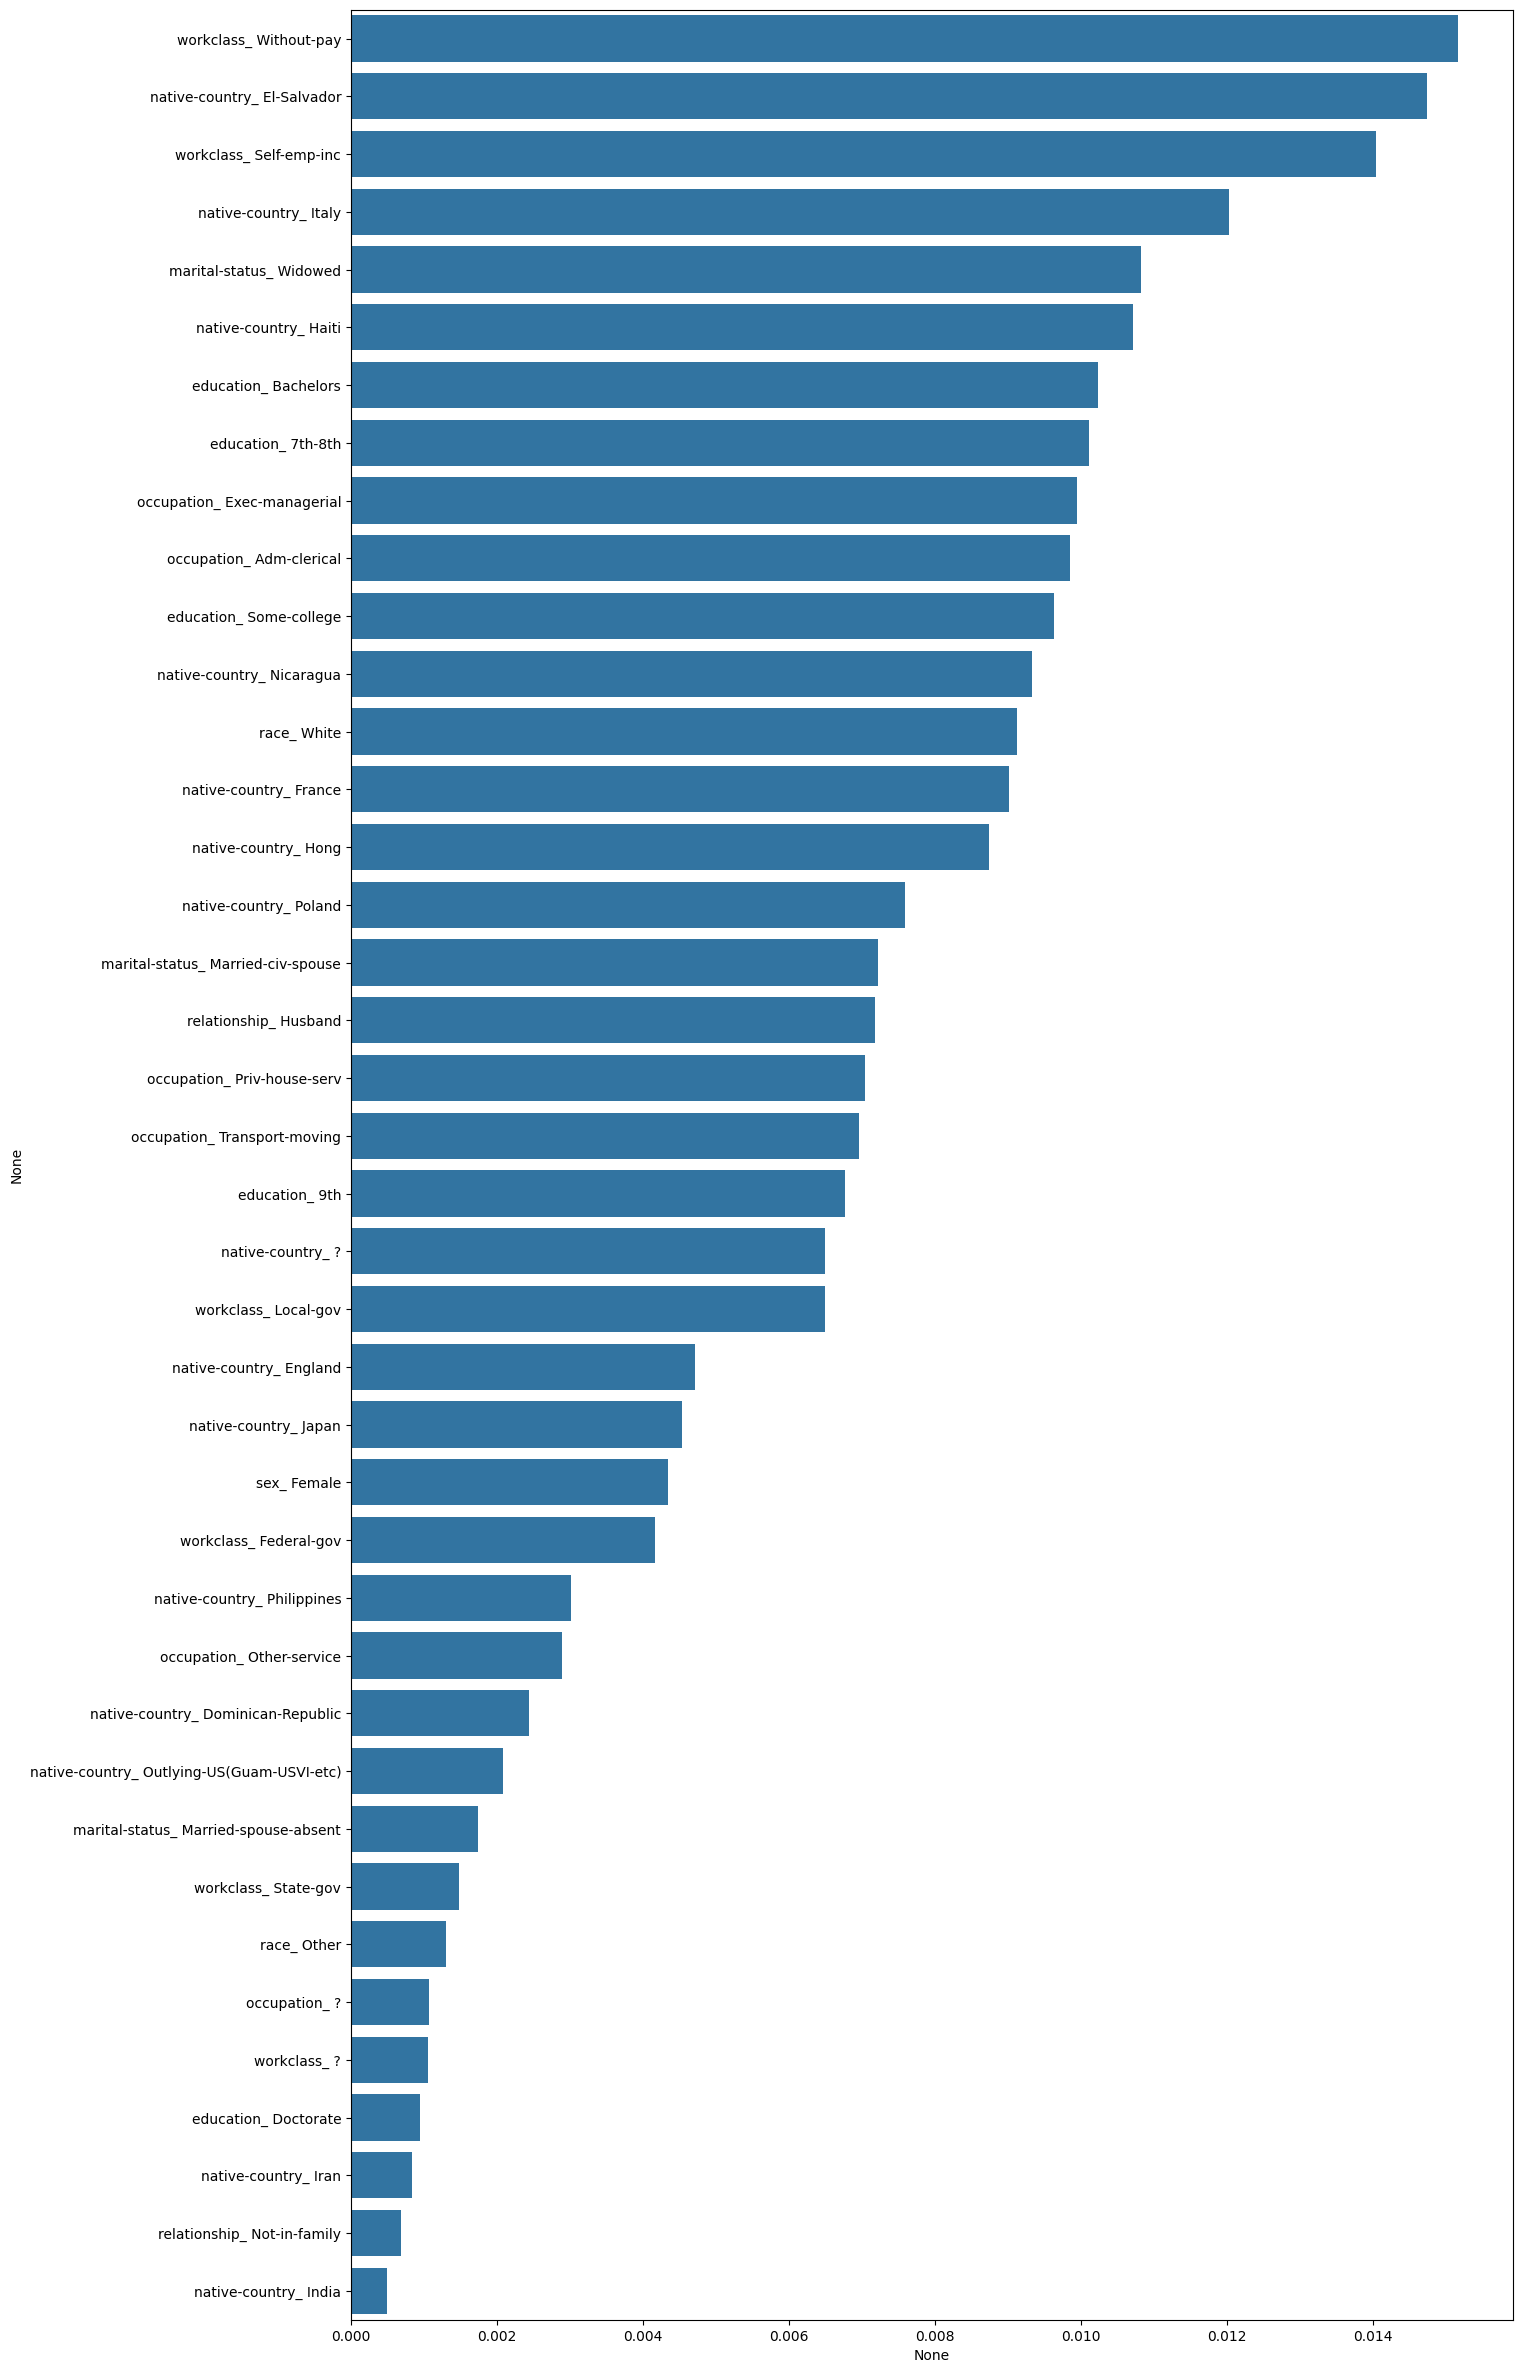

In [134]:
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), cat)],
    remainder='passthrough'
)

# Применяем трансформер на обучающих данных
X_encoded = encoder.fit_transform(X_train[cat])

# Преобразуем результат в DataFrame с правильными именами колонок
encoded_columns = encoder.transformers_[0][1].get_feature_names_out(cat)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_columns)

# Вычисляем корреляцию между закодированными категориальными признаками и целевой переменной
correlations = X_encoded_df.corrwith(y_train).sort_values(ascending=False)[:40,]

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 30)

Теперь видно топ 40 значений категориальных признаков, что наилучше коррелируют с тагрентным значением